In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
# IMPORTING Dataset
df=pd.read_csv('car.csv')

In [3]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [4]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
 df.tail()

,name,company,year,Price,kms_driven,fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


 ### NUMBER OF ROWS AND COLUMNS IN DATASET

In [6]:
rows, columns = df.shape
print(f'Dataset has {rows} rows and {columns} columns.')   

Dataset has 892 rows and 6 columns.


### NUMBER OF FEATURES 

In [7]:
# Looping to find the number of categorical and numerical features
num,obj = 0,0
for feature in df.columns:
    if df.dtypes[feature] !='O':
        num += 1
    else:
        obj += 1   
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'There are {num} numerical features and {obj} categorical features.')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
There are 0 numerical features and 6 categorical features.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [9]:
# Cleaning 'year' column (convert to integer)
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# Cleaning 'Price' column: Remove commas & convert to numeric, handling 'Ask For Price'
df["Price"] = df["Price"].str.replace(",", "").str.extract("(\d+)")  # Extract numeric part
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")  # Convert to numeric

# Cleaning 'kms_driven' column: Remove ' kms' & commas, then convert to numeric
df["kms_driven"] = df["kms_driven"].str.replace(" kms", "").str.replace(",", "")
df["kms_driven"] = pd.to_numeric(df["kms_driven"], errors="coerce")

# Checking the cleaned dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        892 non-null    object 
 1   company     892 non-null    object 
 2   year        842 non-null    float64
 3   Price       857 non-null    float64
 4   kms_driven  838 non-null    float64
 5   fuel_type   837 non-null    object 
dtypes: float64(3), object(3)
memory usage: 41.9+ KB


(None,
                                      name   company    year     Price  \
 0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007.0   80000.0   
 1                 Mahindra Jeep CL550 MDI  Mahindra  2006.0  425000.0   
 2              Maruti Suzuki Alto 800 Vxi    Maruti  2018.0       NaN   
 3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014.0  325000.0   
 4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014.0  575000.0   
 
    kms_driven fuel_type  
 0     45000.0    Petrol  
 1        40.0    Diesel  
 2     22000.0    Petrol  
 3     28000.0    Petrol  
 4     36000.0    Diesel  )

In [10]:
# 5 point summary
df.describe()

,year,Price,kms_driven
count,842.000000,8.570000e+02,838.000000
mean,2012.523753,4.046885e+05,46010.550119
std,4.024601,4.655365e+05,34469.626299
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,25000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.850000e+05,56437.500000
max,2019.000000,8.500003e+06,400000.000000


# Data Preparation

In [11]:
# Duplicates Rows
df[df.duplicated()]

,name,company,year,Price,kms_driven,fuel_type
14,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007.0,80000.0,45000.0,Petrol
15,Mahindra Jeep CL550 MDI,Mahindra,2006.0,425000.0,40.0,Diesel
20,Mahindra Scorpio S10,Mahindra,2016.0,350000.0,43000.0,Diesel
24,Hyundai i20 Sportz 1.2,Hyundai,2012.0,100000.0,55000.0,Petrol
25,Hyundai i20 Sportz 1.2,Hyundai,2012.0,100000.0,55000.0,Petrol
...,...,...,...,...,...,...
626,Tata Sumo Gold EX BS IV,Tata,2012.0,210000.0,75000.0,Diesel
641,Maruti Suzuki Swift VDi BS IV,Maruti,2012.0,280000.0,48006.0,Diesel
727,Mahindra Scorpio S4,Mahindra,2015.0,865000.0,30000.0,Diesel
861,Hyundai Getz Prime 1.3 GLX,Hyundai,2009.0,115000.0,20000.0,Petrol


# here, we found 94 duplicate rows so, we have to remove them

In [12]:
df=df.drop_duplicates()

In [13]:
df[df.duplicated()]

,name,company,year,Price,kms_driven,fuel_type


# droped all the duplicate rows from the dataset

In [14]:
# we have to check missing values in the data set

df.isnull().sum()

name           0
company        0
year          49
Price         33
kms_driven    52
fuel_type     53
dtype: int64

In [15]:
len(df)

798

In [16]:
percentage=df.isnull().sum()/len(df)*100
percentage

name          0.000000
company       0.000000
year          6.140351
Price         4.135338
kms_driven    6.516291
fuel_type     6.641604
dtype: float64

In [17]:
# Impute numerical columns with median
df["year"].fillna(df["year"].median(), inplace=True)
df["Price"].fillna(df["Price"].median(), inplace=True)
df["kms_driven"].fillna(df["kms_driven"].median(), inplace=True)

# Impute categorical column with mode (most frequent value)
df["fuel_type"].fillna(df["fuel_type"].mode()[0], inplace=True)

# Verify missing values are handled
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        798 non-null    object 
 1   company     798 non-null    object 
 2   year        798 non-null    float64
 3   Price       798 non-null    float64
 4   kms_driven  798 non-null    float64
 5   fuel_type   798 non-null    object 
dtypes: float64(3), object(3)
memory usage: 43.6+ KB


In [19]:
# Fuel_Type col
df['fuel_type'].value_counts()

fuel_type
Petrol    455
Diesel    341
LPG         2
Name: count, dtype: int64

In [20]:
#checking for unique values in the dataset
df.nunique()

name          525
company        48
year           21
Price         273
kms_driven    255
fuel_type       3
dtype: int64

In [21]:
df['Price'].value_counts()

Price
290000.0    39
250000.0    14
350000.0    13
130000.0    12
450000.0    11
            ..
770000.0     1
335000.0     1
635000.0     1
65000.0      1
500001.0     1
Name: count, Length: 273, dtype: int64

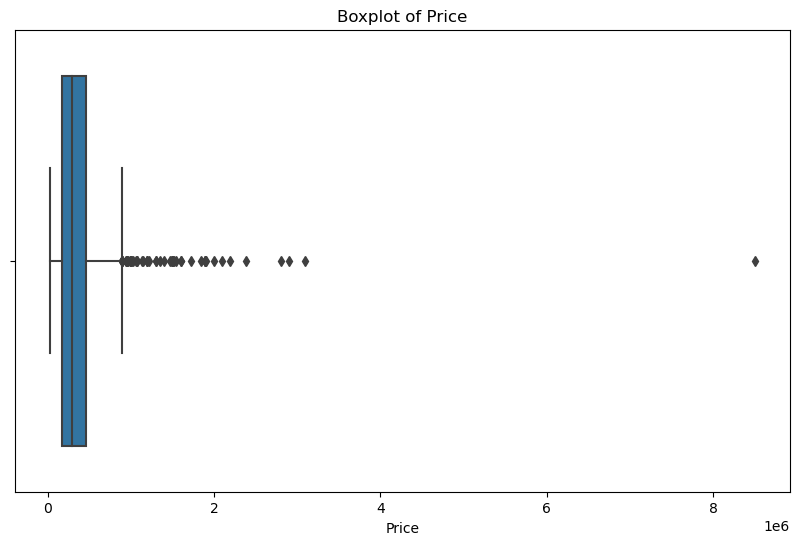

In [22]:
#Boxplot for price
plt.figure(figsize=(10,6))
sns.boxplot(x='Price',data=df)
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

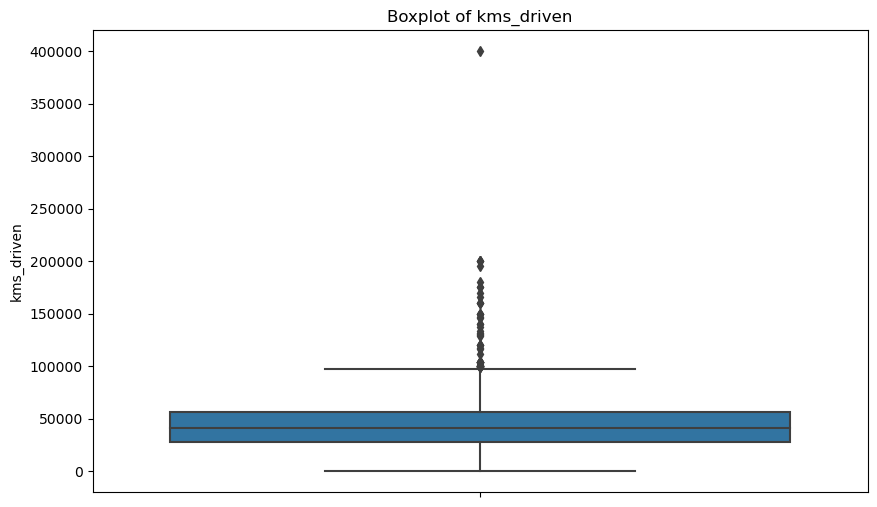

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(y='kms_driven',data=df)
plt.title('Boxplot of kms_driven')
plt.ylabel('kms_driven')
plt.show()

In [24]:
df.describe()

,year,Price,kms_driven
count,798.000000,7.980000e+02,798.000000
mean,2012.444862,3.914485e+05,46121.477444
std,4.017383,4.598390e+05,33637.435189
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.700000e+05,28121.000000
50%,2013.000000,2.900000e+05,41000.000000
75%,2015.000000,4.612500e+05,56000.000000
max,2019.000000,8.500003e+06,400000.000000


In [25]:
# univariate

<Axes: xlabel='Price', ylabel='Density'>

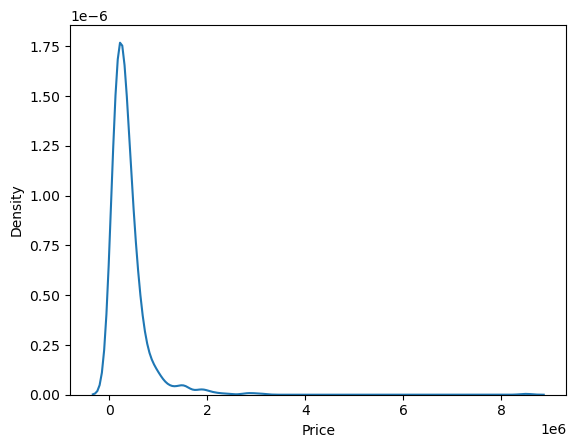

In [26]:
sns.kdeplot(df['Price'])

In [27]:
# Bivariate

Text(0.5, 1.0, 'Price vs. kms_driven')

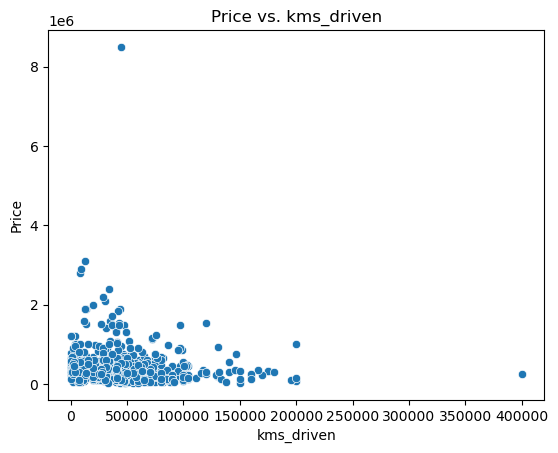

In [28]:
sns.scatterplot(x='kms_driven', y='Price', data=df)
plt.title('Price vs. kms_driven')

In [29]:
# Calculate Q1, Q3, and IQR for 'Price'
Q1_price = df['Price'].quantile(0.25)
Q3_price = df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Calculate Q1, Q3, and IQR for 'KMS Driven'
Q1_kms = df['kms_driven'].quantile(0.25)
Q3_kms = df['kms_driven'].quantile(0.75)
IQR_kms = Q3_kms - Q1_kms

# Define bounds for 'Price' and 'KMS Driven'
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
lower_bound_kms = Q1_kms - 1.5 * IQR_kms
upper_bound_kms = Q3_kms + 1.5 * IQR_kms

# Filter out outliers
df_filtered = df[(df['Price'] >= lower_bound_price) & (df['Price'] <= upper_bound_price) & 
                 (df['kms_driven'] >= lower_bound_kms) & (df['kms_driven'] <= upper_bound_kms)]

In [30]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        694 non-null    object 
 1   company     694 non-null    object 
 2   year        694 non-null    float64
 3   Price       694 non-null    float64
 4   kms_driven  694 non-null    float64
 5   fuel_type   694 non-null    object 
dtypes: float64(3), object(3)
memory usage: 38.0+ KB


# scatter plot after removing outlier

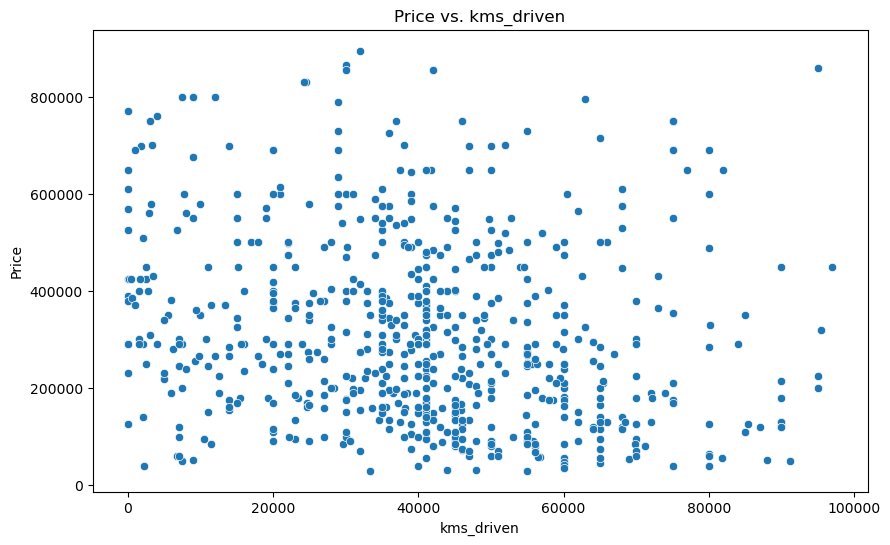

In [31]:
#After removing outliers, you can visualize the scatter plot again:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='Price', data=df_filtered)
plt.title('Price vs. kms_driven')
plt.xlabel('kms_driven')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='fuel_type', ylabel='count'>

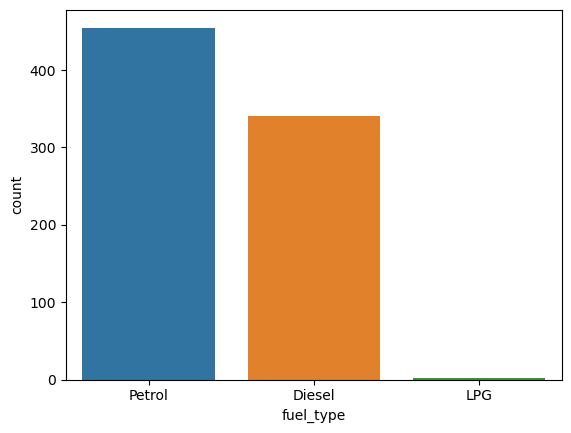

In [32]:
sns.countplot(x='fuel_type',data=df)

<Axes: ylabel='count'>

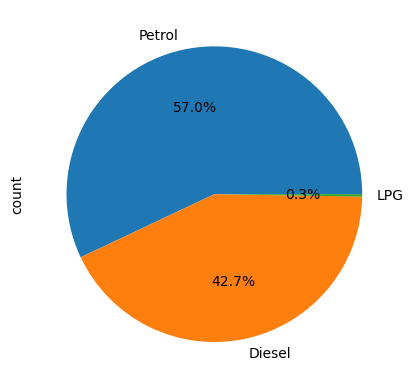

In [33]:
df['fuel_type'].value_counts().plot.pie(autopct='%1.1f%%')

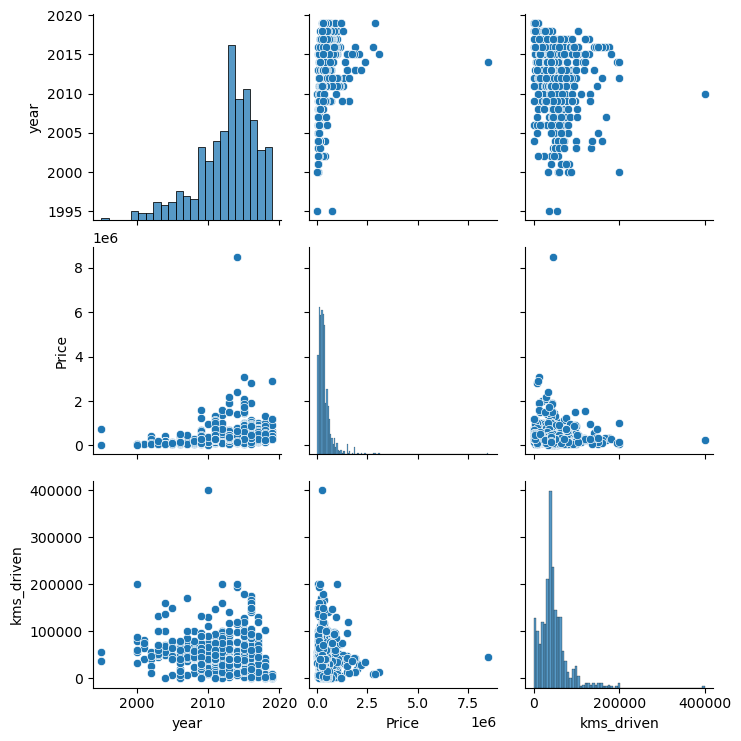

In [34]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Matrix')

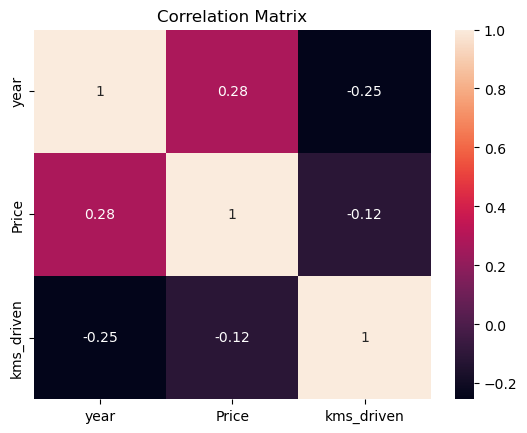

In [35]:
# Heatmap for correlation matrix
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Correlation Matrix')

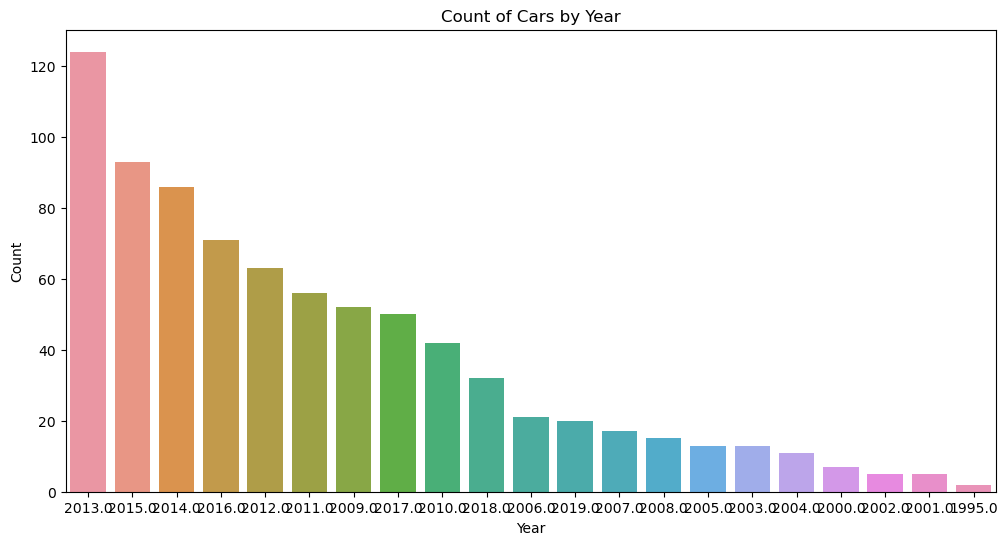

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df, order=df['year'].value_counts().index)
plt.title('Count of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

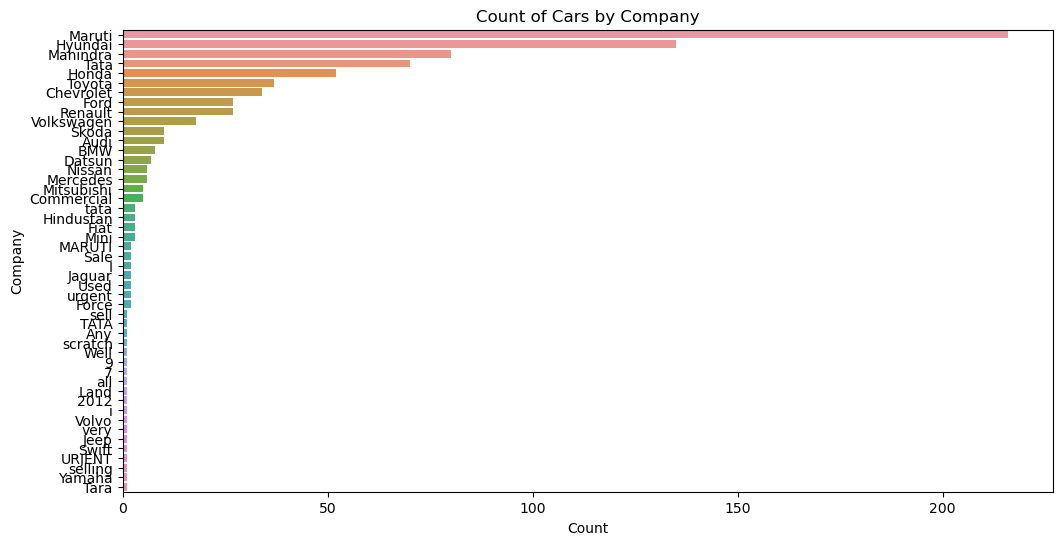

In [37]:
# Bar plot for categorical features
plt.figure(figsize=(12, 6))
sns.countplot(y='company', data=df, order=df['company'].value_counts().index)
plt.title('Count of Cars by Company')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()

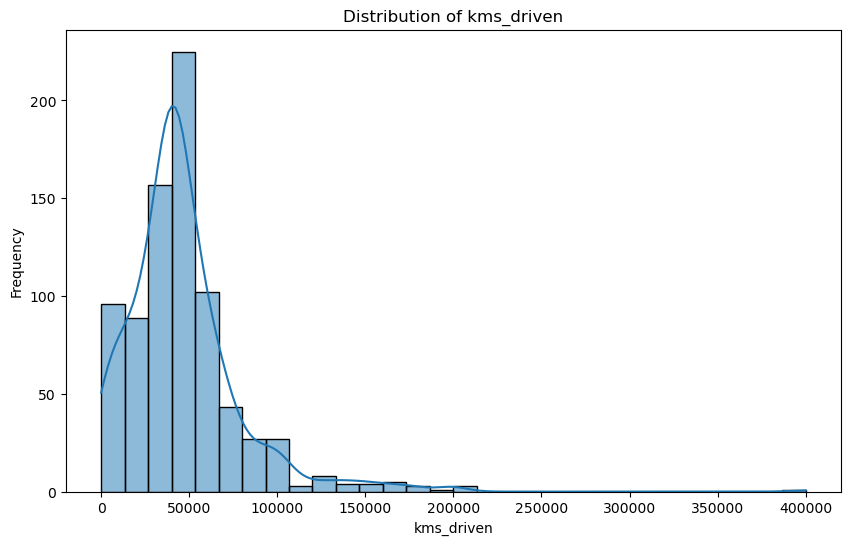

In [38]:
# Distribution of kms_driven
plt.figure(figsize=(10, 6))
sns.histplot(df['kms_driven'], kde=True, bins=30)
plt.title('Distribution of kms_driven')
plt.xlabel('kms_driven')
plt.ylabel('Frequency')
plt.show()

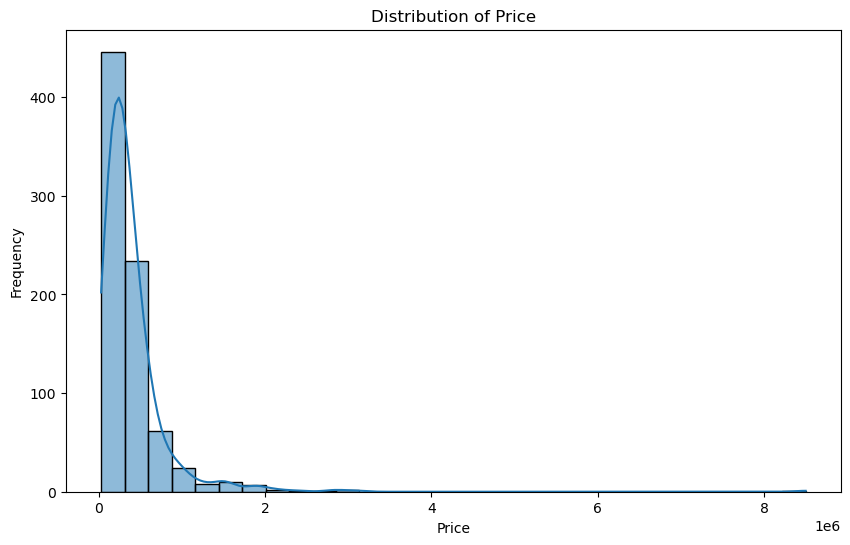

In [39]:
# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering

In [44]:
# Drop 'name' column as it doesn't contribute to prediction
df.drop(columns=["name"], inplace=True)

# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=["company", "fuel_type"], drop_first=True)

# Display 
df = df.astype(int)
df.head()

,year,Price,kms_driven,company_7,company_9,company_Any,company_Audi,company_BMW,company_Chevrolet,company_Commercial,...,company_all,company_i,company_scratch,company_sell,company_selling,company_tata,company_urgent,company_very,fuel_type_LPG,fuel_type_Petrol
0,2007,80000,45000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,425000,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,290000,22000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,325000,28000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,575000,36000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [46]:
# Define features (X) and target variable (y)
X = df.drop(columns=["Price"])
y = df["Price"]

In [47]:
# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X

,year,kms_driven,company_7,company_9,company_Any,company_Audi,company_BMW,company_Chevrolet,company_Commercial,company_Datsun,...,company_all,company_i,company_scratch,company_sell,company_selling,company_tata,company_urgent,company_very,fuel_type_LPG,fuel_type_Petrol
0,2007,45000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,22000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,28000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,36000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2013,41000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,2018,27000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,2013,40000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,2014,41000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
y

0       80000
1      425000
2      290000
3      325000
4      575000
        ...  
887    310000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 798, dtype: int32

In [50]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Make predictions
y_pred = model.predict(X_test)

In [53]:
# Evaluate model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2, rmse

(0.6190503824963556, 226973.49466353186)

# I have tried with Random Forest Model As well but it doesn't gives that much accuracy as compare to Linear Regression.